In [9]:
import numpy as np
import matplotlib.pylab as pl
import ot
from imageio.v2 import imread
from random import choices
import os

In [2]:
def load_image(fname):
    img = imread(fname, as_gray=True)  # Grayscale
    img = (img[::-1, :]) / 255.0
    return 1 - img
def draw_samples(fname, n):
    A = load_image(fname)
    xg, yg = np.meshgrid(
        np.linspace(0, 1, A.shape[0]),
        np.linspace(0, 1, A.shape[1]),
        indexing="xy",
    )

    grid = list(zip(xg.ravel(), yg.ravel()))
    dens = A.ravel() / A.sum()
    dots = np.array(choices(grid, dens, k=n))
    dots += (0.5 / A.shape[0]) * np.random.standard_normal(dots.shape)

    return dots

In [3]:
# Interpolation 'naive'

Text(0.5, 1.0, 'Distributions')

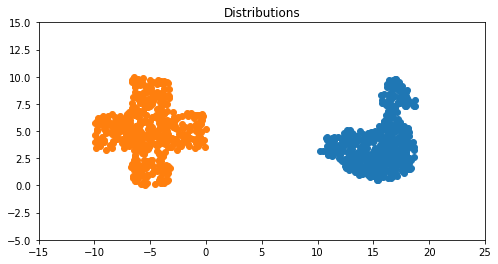

In [4]:
n=500
xs=10*draw_samples("./duck.png", n=n)+np.array([10,0])
xt=10*draw_samples("./redcross.png", n=n)+np.array([-10,0])


pl.figure(1, (8, 4))
pl.scatter(xs[:, 0], xs[:, 1])
pl.scatter(xt[:, 0], xt[:, 1])
pl.xlim(-15,25)
pl.ylim(-5,15)
pl.title('Distributions')

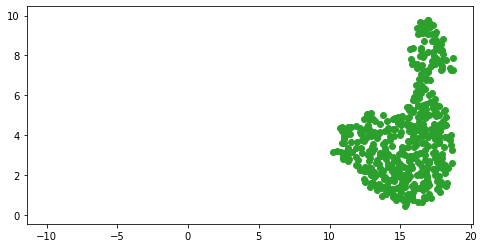

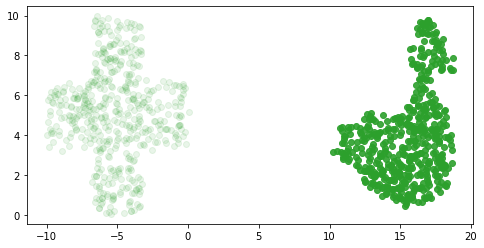

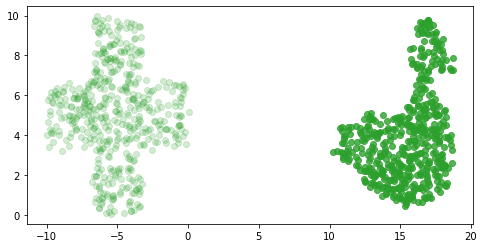

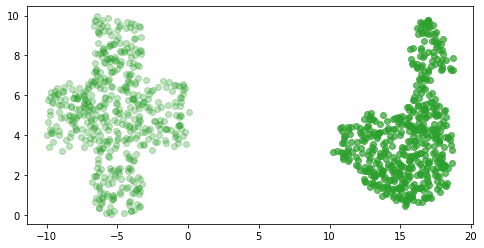

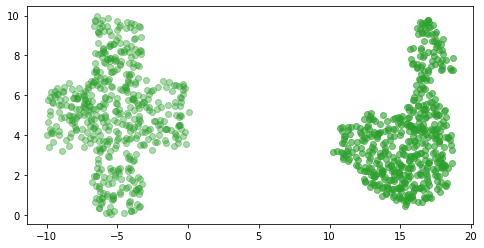

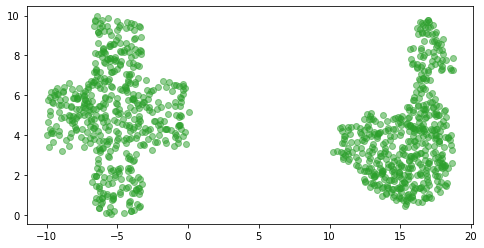

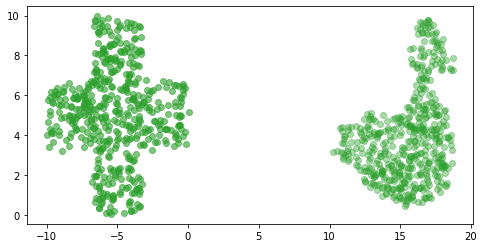

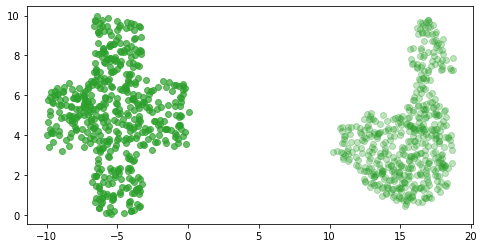

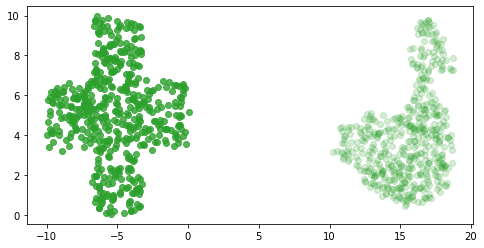

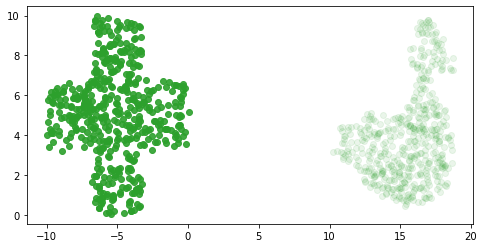

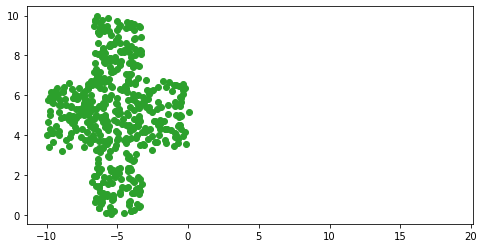

In [5]:
for t in range(11):
    pl.figure(figsize=(8,4))
    pl.scatter(xs[:, 0], xs[:, 1], c='C2', label='',alpha=1-t/10)
    pl.scatter(xt[:, 0], xt[:, 1], c='C2', label='',alpha=t/10)

# Geodesics de Wasserstein

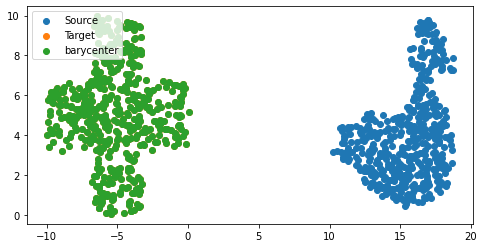

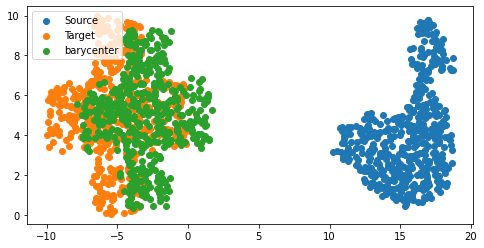

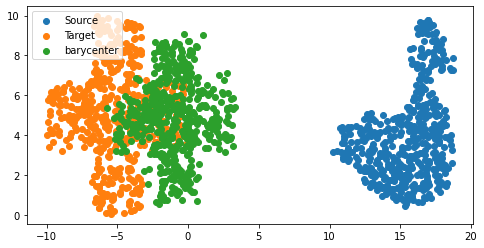

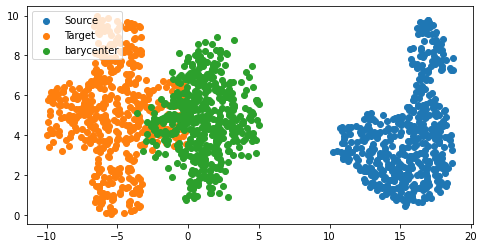

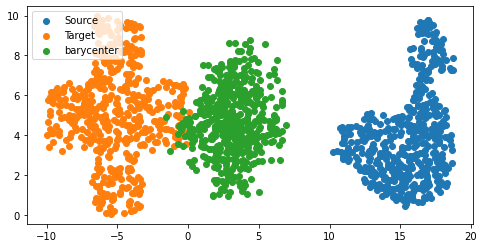

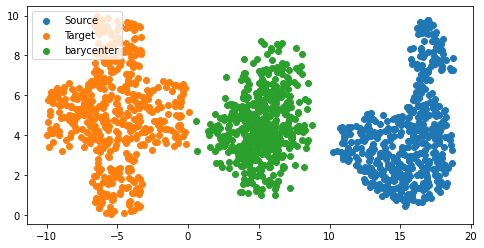

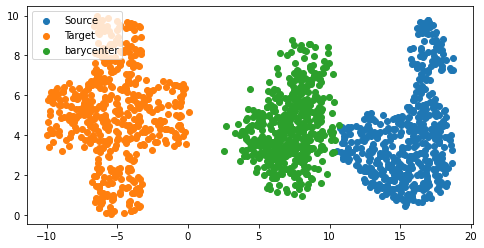

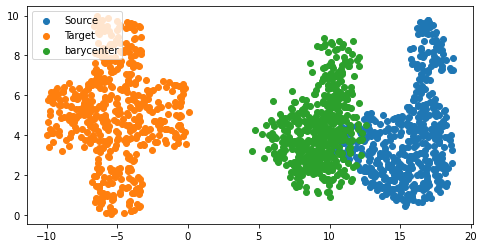

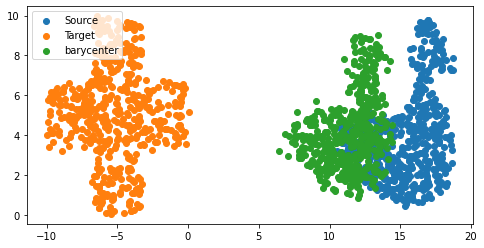

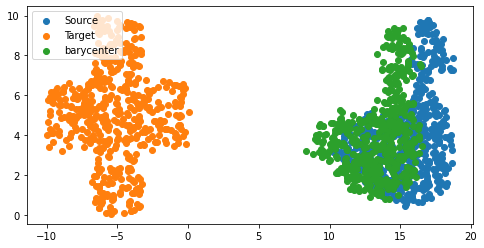

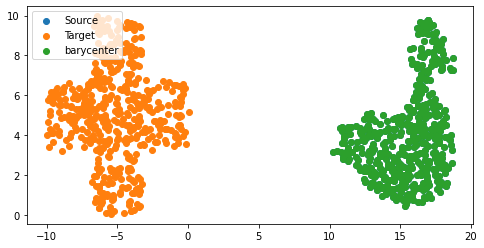

In [6]:
C=ot.dist(xs,xt)
P=ot.emd(np.ones((n,)),np.ones((n,)),C)

t=.1


for t in range(11):
    t=t/10
    z=(1-t)*xt+t*(P@xs)
    pl.figure(figsize=(8,4))
    pl.scatter(xs[:, 0], xs[:, 1], c='C0', label='Source')
    pl.scatter(xt[:, 0], xt[:, 1], c='C1', label='Target')
    pl.scatter(z[:, 0], z[:, 1], c='C2', label='barycenter')
    pl.legend(loc=2)

In [7]:
"""
measures_locations = [xs, xt]
measures_weights = [np.ones((n,))/n, np.ones((n,))/n]

k = 200  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,))/k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

z = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

pl.figure(figsize=(8, 4))
pl.scatter(xs[:, 0], xs[:, 1])
pl.scatter(xt[:, 0], xt[:, 1])
pl.scatter(z[:, 0], z[:, 1], label='2-Wasserstein barycenter')
pl.title('Data measures and their barycenter')
pl.legend(loc="lower right")
pl.show()"""


'\nmeasures_locations = [xs, xt]\nmeasures_weights = [np.ones((n,))/n, np.ones((n,))/n]\n\nk = 200  # number of Diracs of the barycenter\nX_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations\nb = np.ones((k,))/k  # weights of the barycenter (it will not be optimized, only the locations are optimized)\n\nz = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)\n\npl.figure(figsize=(8, 4))\npl.scatter(xs[:, 0], xs[:, 1])\npl.scatter(xt[:, 0], xt[:, 1])\npl.scatter(z[:, 0], z[:, 1], label=\'2-Wasserstein barycenter\')\npl.title(\'Data measures and their barycenter\')\npl.legend(loc="lower right")\npl.show()'

### Exemple de Geodesics entre images 
https://www.math.purdue.edu/~jacob225/optimal-transport.html

# Barycenter entre plusieurs proba

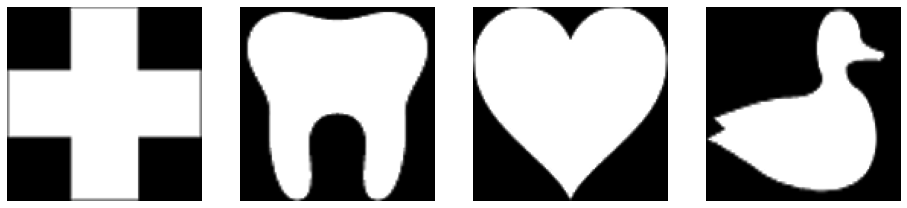

In [10]:

f1 = 1 - pl.imread(os.path.join('./redcross.png'))[:, :, 2]
f2 = 1 - pl.imread(os.path.join('./tooth.png'))[:, :, 2]
f3 = 1 - pl.imread(os.path.join('./heart.png'))[:, :, 2]
f4 = 1 - pl.imread(os.path.join('./duck.png'))[:, :, 2]

f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A = np.array([f1, f2, f3, f4])


pl.figure(figsize=(16,4))
pl.subplot(1, 4,1)
pl.imshow(f1,cmap='gray')
pl.axis('off')

pl.subplot(1, 4,2)
pl.imshow(f2,cmap='gray')
pl.axis('off')

pl.subplot(1, 4,3)
pl.imshow(f3,cmap='gray')
pl.axis('off')

pl.subplot(1, 4,4)
pl.imshow(f4,cmap='gray')
pl.axis('off')


# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))


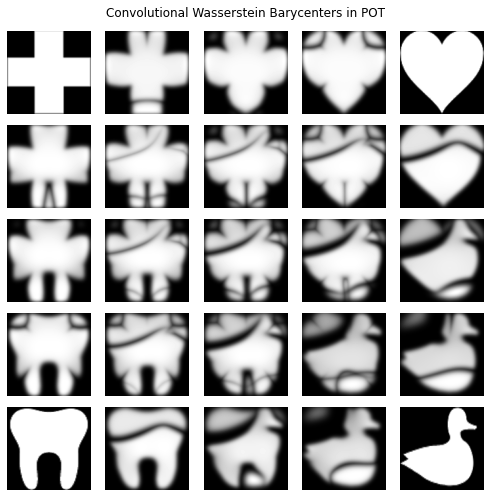

In [11]:
##############################################################################
# Barycenter computation and visualization
# ----------------------------------------
#
nb_images = 5
fig, axes = pl.subplots(nb_images, nb_images, figsize=(7, 7))
pl.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 1e-3
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap='gray')
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap='gray')
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap='gray')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap='gray')
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cmap='gray'
            )
        axes[i, j].axis('off')
pl.tight_layout()
pl.show()